In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("layoffs.csv")
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0


##### Check Null Values and do the necessory

In [3]:
df.isnull().any()

company                  False
location                 False
industry                  True
total_laid_off            True
percentage_laid_off       True
date                      True
stage                     True
country                  False
funds_raised_millions     True
dtype: bool

In [4]:
# In percentage_laid_off column fill the null value with help of mean.
df.fillna({'percentage_laid_off': df['percentage_laid_off'].mean()}, inplace=True)

In [5]:
# In total_laid_off column fill the null value with help of mean.
df.fillna({'total_laid_off': df['total_laid_off'].mean()}, inplace=True)

In [6]:
df[df['industry'].isna()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
8,Airbnb,SF Bay Area,NaN,30.000000,0.257917,3/3/2023,Post-IPO,United States,6400.0
330,Bally's Interactive,Providence,NaN,238.358421,0.150000,1/18/2023,Post-IPO,United States,946.0
736,Juul,SF Bay Area,NaN,400.000000,0.300000,11/10/2022,Unknown,United States,1500.0
1595,Carvana,Phoenix,NaN,2500.000000,0.120000,5/10/2022,Post-IPO,United States,1600.0


In [7]:
industy_mapping={
'Airbnb': 'Hospitality',
    "Bally's Interactive": 'Gaming',
    'Juul': 'consumer',
    'Carvana': 'Transporation'

}

df['industry']=df['industry'].fillna(df['company'].map(industy_mapping))

##### Drop unnecessary column and row as well as duplicate row or columns

In [8]:
df.drop(columns=['stage','funds_raised_millions'],inplace=True)

In [9]:
df.drop([2356],inplace=True)

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2355    False
2357     True
2358     True
2359     True
2360     True
Length: 2360, dtype: bool

In [11]:
df[df['company'].duplicated()==1]

,company,location,industry,total_laid_off,percentage_laid_off,date,country
169,Getir,New York City,Food,100.000000,0.257917,2/2/2023,United States
260,Bolt,SF Bay Area,Finance,50.000000,0.100000,1/24/2023,United States
370,Arch Oncology,Brisbane,Healthcare,238.358421,1.000000,1/13/2023,United States
402,Oyster,Charlotte,HR,238.358421,0.257917,1/11/2023,United States
442,Twitter,SF Bay Area,Consumer,40.000000,0.257917,1/5/2023,United States
...,...,...,...,...,...,...,...
2355,EasyPost,Salt Lake City,Logistics,75.000000,0.257917,3/11/2020,United States
2357,Yahoo,SF Bay Area,Consumer,1600.000000,0.200000,2/9/2023,United States
2358,Hibob,Tel Aviv,HR,70.000000,0.300000,3/30/2020,Israel
2359,Casper,New York City,Retail,238.358421,0.257917,9/14/2021,United States


In [12]:
df=df.drop_duplicates()
df

,company,location,industry,total_laid_off,percentage_laid_off,date,country
0,Atlassian,Sydney,Other,500.000000,0.050000,3/6/2023,Australia
1,SiriusXM,New York City,Media,475.000000,0.080000,3/6/2023,United States
2,Alerzo,Ibadan,Retail,400.000000,0.257917,3/6/2023,Nigeria
3,UpGrad,Mumbai,Education,120.000000,0.257917,3/6/2023,India
4,Loft,Sao Paulo,Real Estate,340.000000,0.150000,3/3/2023,Brazil
...,...,...,...,...,...,...,...
2351,Service,Los Angeles,Travel,238.358421,1.000000,3/16/2020,United States
2352,HopSkipDrive,Los Angeles,Transportation,8.000000,0.100000,3/13/2020,United States
2353,Panda Squad,SF Bay Area,Consumer,6.000000,0.750000,3/13/2020,United States
2354,Tamara Mellon,Los Angeles,Retail,20.000000,0.400000,3/12/2020,United States


##### Change date dtype in datetime

In [13]:
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              2354 non-null   object        
 1   location             2354 non-null   object        
 2   industry             2354 non-null   object        
 3   total_laid_off       2354 non-null   float64       
 4   percentage_laid_off  2354 non-null   float64       
 5   date                 2354 non-null   datetime64[ns]
 6   country              2354 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 147.1+ KB


In [14]:
df.to_csv('cleaned.csv')

In [15]:
df.loc[df['country']=='India']


,company,location,industry,total_laid_off,percentage_laid_off,date,country
3,UpGrad,Mumbai,Education,120.000000,0.257917,2023-03-06,India
14,Fittr,Pune,Fitness,30.000000,0.110000,2023-03-02,India
16,Flipkart,Bengaluru,Retail,238.358421,0.257917,2023-03-02,India
29,DUX Education,Bengaluru,Education,238.358421,1.000000,2023-02-28,India
40,SAP Labs,Bengaluru,Other,300.000000,0.257917,2023-02-24,India
...,...,...,...,...,...,...,...
2221,Acko,Mumbai,Finance,45.000000,0.090000,2020-04-01,India
2253,FabHotels,New Delhi,Travel,80.000000,0.200000,2020-03-30,India
2267,TravelTriangle,Gurugram,Travel,250.000000,0.500000,2020-03-28,India
2294,Fareportal,Gurugram,Travel,200.000000,0.257917,2020-03-26,India


In [16]:
df.shape

(2354, 7)

# Questions

##### 1. What is the total number of companies that have laid off employees?

In [17]:
total_companies=df['company'].nunique()
print(f"the total number of companies that have laid off employees is {total_companies}")


the total number of companies that have laid off employees is 1892


##### 2. Which company laid off the highest number of employees?


In [18]:
max_layoffs_company=df.loc[df['total_laid_off'].idxmax()]['company']
print(f"{max_layoffs_company} is the company laid off the highest number of employees")

Google is the company laid off the highest number of employees


##### 3. What is the average percentage of employees laid off across all companies?

In [19]:
avg_percentage_laid_off=df['percentage_laid_off'].mean()

print(f"The average percentage of employees laid off across all companies is {avg_percentage_laid_off}")

The average percentage of employees laid off across all companies is 0.2580444622017174


##### 4. layoffs in the USA affect other countries, particularly India?

In [20]:
usa_layoffs = df[df['country'] == 'United States']
india_layoffs = df[df['country'] == 'India']

In [21]:

usa_layoffs_by_date = usa_layoffs.groupby('date')['total_laid_off'].sum()
india_layoffs_by_date = india_layoffs.groupby('date')['total_laid_off'].sum()


In [22]:

usa_layoffs_monthly = usa_layoffs_by_date.resample('M').sum().fillna(0)
india_layoffs_monthly = india_layoffs_by_date.resample('M').sum().fillna(0)

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_29136\414407228.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  usa_layoffs_monthly = usa_layoffs_by_date.resample('M').sum().fillna(0)
C:\Users\Pavilion\AppData\Local\Temp\ipykernel_29136\414407228.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  india_layoffs_monthly = india_layoffs_by_date.resample('M').sum().fillna(0)


In [23]:
# Calculate the correlation coefficient
correlation = usa_layoffs_monthly.corr(india_layoffs_monthly)
print(f'Correlation between USA and India layoffs: {correlation}')

Correlation between USA and India layoffs: 0.5206243530619079


A correlation coefficient of 0.5206243530619079 indicates a moderate positive correlation between layoffs in the USA and layoffs in India.

1. Positive Correlation:

    The positive value suggests that as layoffs in the USA increase, layoffs in India also tend to increase. Conversely, as layoffs in the USA decrease, layoffs in India also tend to decrease.

2. Moderate Strength:

    A correlation coefficient of around 0.52 is moderate, implying a noticeable but not strong relationship. It indicates that while there is a connection, other factors also significantly influence layoffs in India.

Conclusion :-
    
The moderate positive correlation indicates a relationship between layoffs in the USA and India, reflecting interconnected economic activities. However, this relationship is not overwhelmingly strong, suggesting that while the USA's economic conditions influence India, other local and global factors are also important.




-----------------------------------------------------------------------------------------------

In [24]:
India_df=df.loc[df['country']=='India']


In [25]:
India_df.to_csv('india_df.csv')

# QUESTIONS

##### 1. What are the monthly or yearly trends in layoffs in India?

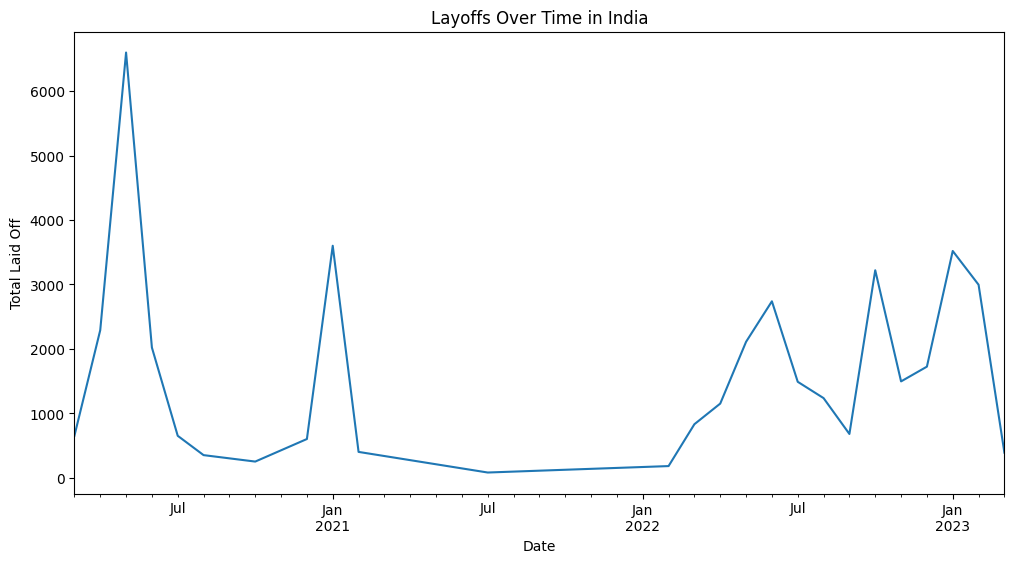

In [26]:


layoffs_over_time = India_df.groupby(India_df['date'].dt.to_period('M'))['total_laid_off'].sum()


layoffs_over_time.plot(kind='line', figsize=(12, 6), title='Layoffs Over Time in India')
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.show()


##### 2. Which industries have been most affected by layoffs in India?

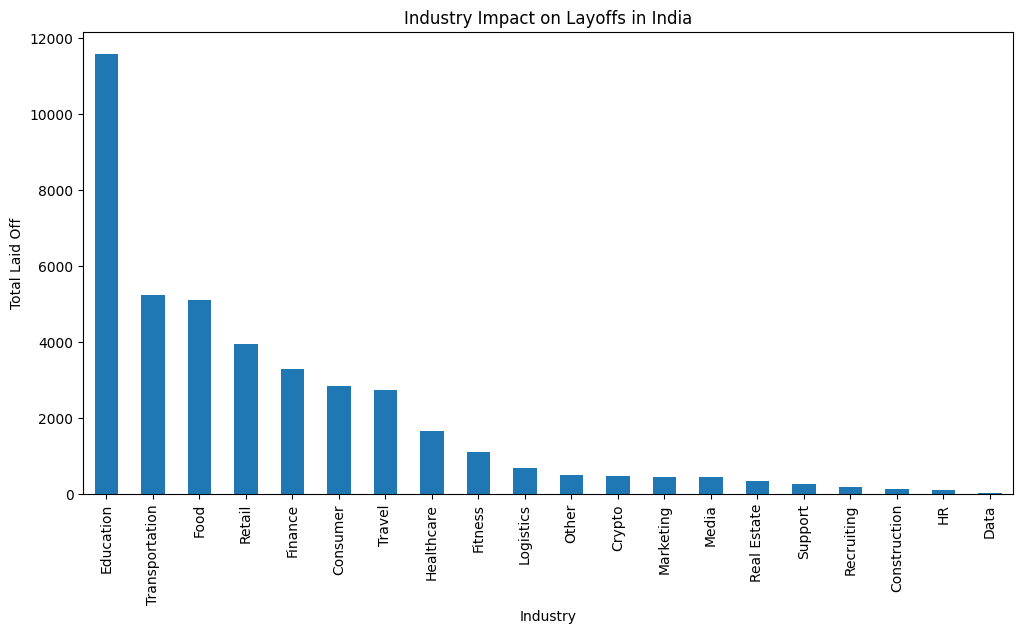

In [27]:

industry_impact = India_df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False)

# Plot the industry impact
industry_impact.plot(kind='bar', figsize=(12, 6), title='Industry Impact on Layoffs in India')
plt.xlabel('Industry')
plt.ylabel('Total Laid Off')
plt.show()


##### 3.  Are there specific cities or regions in India that experienced more layoffs?

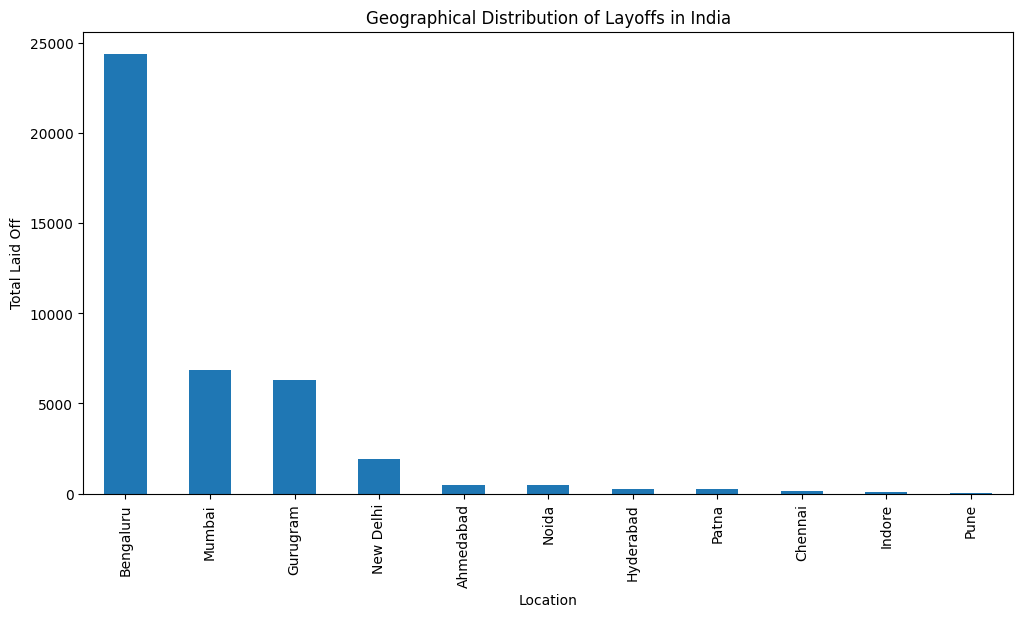

In [28]:

geo_distribution = India_df.groupby('location')['total_laid_off'].sum().sort_values(ascending=False)


geo_distribution.plot(kind='bar', figsize=(12, 6), title='Geographical Distribution of Layoffs in India')
plt.xlabel('Location')
plt.ylabel('Total Laid Off')
plt.show()


##### 4.  Which companies have had the highest number of layoffs in India?

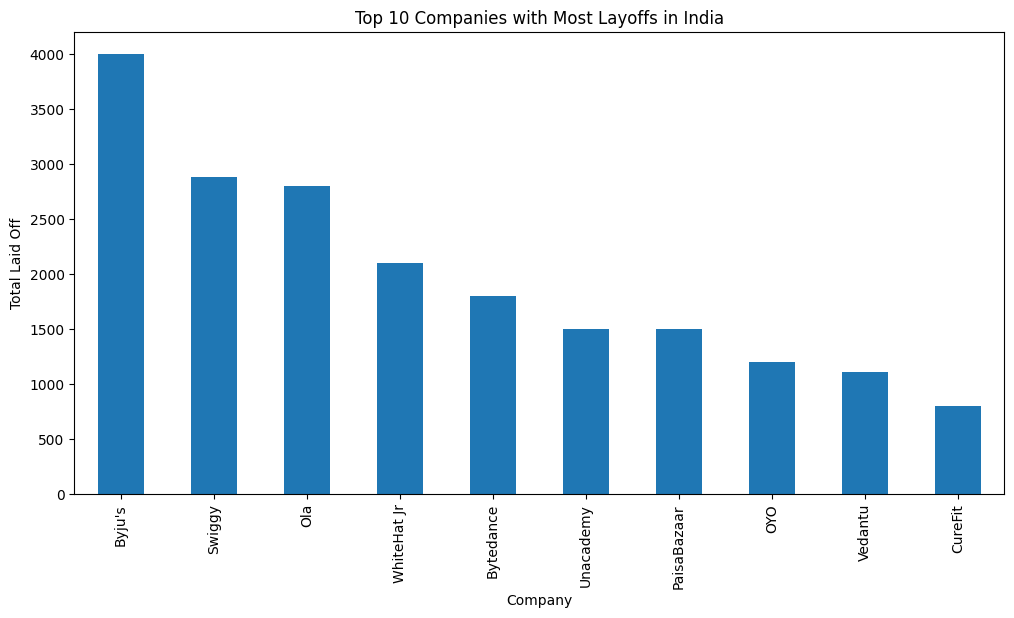

In [29]:

company_impact = India_df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False)


company_impact.head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Companies with Most Layoffs in India')
plt.xlabel('Company')
plt.ylabel('Total Laid Off')
plt.show()


##### 5. What is the average percentage of employees laid off across different companies and industries?

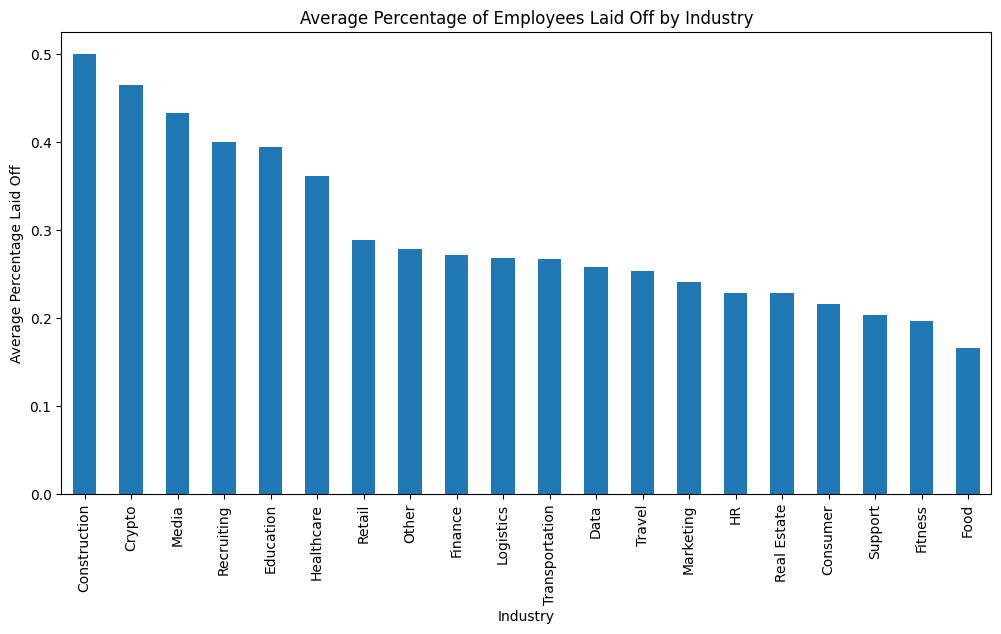

In [30]:

avg_percentage_laid_off = India_df.groupby('industry')['percentage_laid_off'].mean().sort_values(ascending=False)


avg_percentage_laid_off.plot(kind='bar', figsize=(12, 6), title='Average Percentage of Employees Laid Off by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Percentage Laid Off')
plt.show()


In [31]:
India_df.loc[India_df['industry']=='Construction']

,company,location,industry,total_laid_off,percentage_laid_off,date,country
1516,Yojak,Gurugram,Construction,140.0,0.5,2022-06-02,India


In [32]:
India_df.loc[India_df['industry']=='Crypto']

,company,location,industry,total_laid_off,percentage_laid_off,date,country
61,Polygon,Bengaluru,Crypto,100.000000,0.200000,2023-02-21,India
130,WeTrade,Bengaluru,Crypto,238.358421,1.000000,2023-02-09,India
395,CoinDCX,Mumbai,Crypto,80.000000,0.257917,2023-01-11,India
928,WazirX,Mumbai,Crypto,60.000000,0.400000,2022-10-02,India


In [33]:
India_df.loc[India_df['industry']=='Consumer']

,company,location,industry,total_laid_off,percentage_laid_off,date,country
115,TikTok India,Mumbai,Consumer,40.0,0.257917,2023-02-10,India
356,ShareChat,Bengaluru,Consumer,500.0,0.200000,2023-01-16,India
584,ShareChat,Bengaluru,Consumer,100.0,0.257917,2022-12-02,India
1028,Koo,Bengaluru,Consumer,40.0,0.257917,2022-08-31,India
1544,Mobile Premier League,Bengaluru,Consumer,100.0,0.100000,2022-05-30,India
1712,Bytedance,Mumbai,Consumer,1800.0,0.257917,2021-01-27,India
1858,BookMyShow,Mumbai,Consumer,270.0,0.180000,2020-05-28,India


##### 6.  How do layoffs in India compare with those in other countries?

In [34]:
india_layoffs = df[df['country'] == 'India']
other_countries_layoffs = df[df['country'] != 'India']

In [35]:
india_layoffs_by_date = india_layoffs.groupby(india_layoffs['date'].dt.to_period('M'))['total_laid_off'].sum()
other_countries_layoffs_by_date = other_countries_layoffs.groupby(other_countries_layoffs['date'].dt.to_period('M'))['total_laid_off'].sum()

In [36]:
india_layoffs_by_date.index = india_layoffs_by_date.index.to_timestamp()
other_countries_layoffs_by_date.index = other_countries_layoffs_by_date.index.to_timestamp()

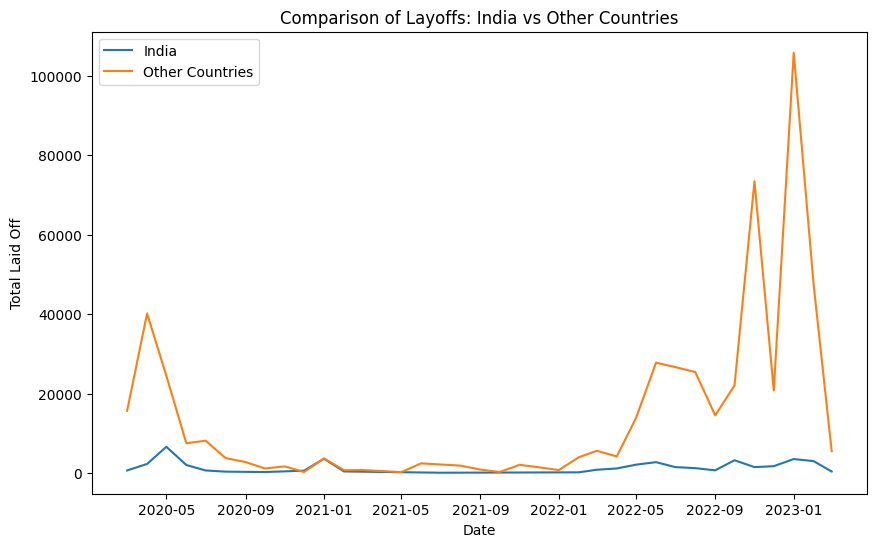

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(india_layoffs_by_date, label='India')
plt.plot(other_countries_layoffs_by_date, label='Other Countries')
plt.title('Comparison of Layoffs: India vs Other Countries')
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.legend()
plt.show()